In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
!pip install missingno
import missingno as msno
from datetime import date
%conda install -c conda-forge seaborn 
import seaborn as sns
%conda update -n base -c defaults conda
!conda install -c conda-forge folium=0.5.0 --yes
import folium
from folium import plugins
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    pandas-1.1.2               |   py36h831f99a_0        10.5 MB  conda-forge
    patsy-0.5.1                |             py_0         187 KB  conda-forge
    scipy-1.5.2                |   py36h3a855aa_0        18.6 MB  conda-forge
    seaborn-0.11.0             |                0           4 KB  conda-forge
    seaborn-base-0.11.0        |             py_0         215 KB  conda-forge
    statsmodels-0.12.0         |   py36h8c4c3a4_0        11

In [16]:
df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv", header = 0,low_memory=False)

In [18]:
df.shape

(194673, 38)

In [19]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [20]:
df['UNDERINFL'].replace("N", "0", inplace=True)
df['UNDERINFL'].replace("Y", "1", inplace=True)

In [21]:
df2 = df.set_index("INCKEY")

In [22]:
df2.shape

(194673, 37)

In [23]:
df3=(df2.drop(columns=['OBJECTID', 'SEVERITYCODE.1', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'INCDTTM', 'SDOT_COLDESC', 'INATTENTIONIND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY'], axis=1))

In [24]:
df3.shape

(194673, 19)

<AxesSubplot:>

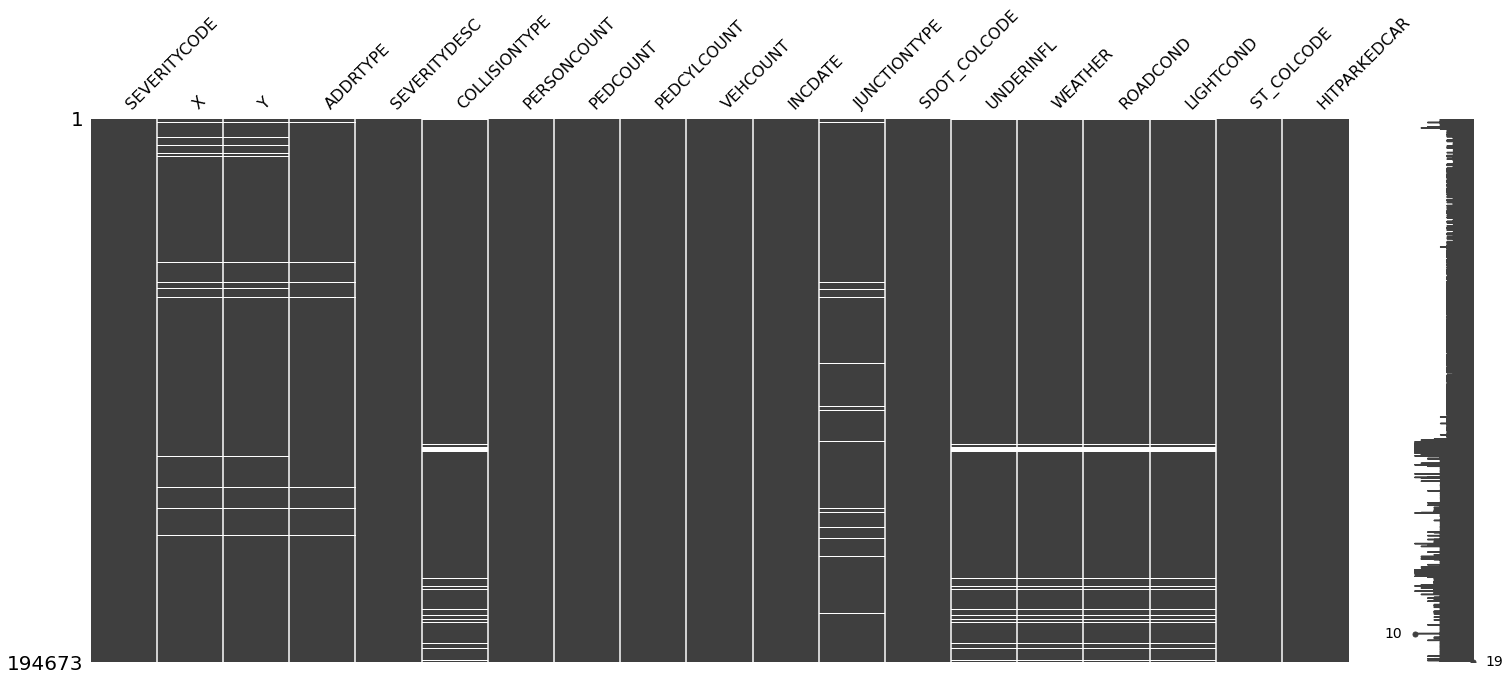

In [26]:
msno.matrix(df3)

In [27]:
df4 = df3.dropna(axis = 0)
df4.shape

(180067, 19)

In [28]:
df4.isnull().sum()

SEVERITYCODE     0
X                0
Y                0
ADDRTYPE         0
SEVERITYDESC     0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
VEHCOUNT         0
INCDATE          0
JUNCTIONTYPE     0
SDOT_COLCODE     0
UNDERINFL        0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
ST_COLCODE       0
HITPARKEDCAR     0
dtype: int64

In [29]:
df4.dtypes

SEVERITYCODE       int64
X                float64
Y                float64
ADDRTYPE          object
SEVERITYDESC      object
COLLISIONTYPE     object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
INCDATE           object
JUNCTIONTYPE      object
SDOT_COLCODE       int64
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
ST_COLCODE        object
HITPARKEDCAR      object
dtype: object

In [30]:
df4[["SDOT_COLCODE"]] = df4[["SDOT_COLCODE"]].astype("object")

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result = result.__finalize__(self)


In [31]:
df4['INCDATE'] = pd.to_datetime(df4['INCDATE'])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
from datetime import date
df4['year'], df4['month'],df4["weekday"] = df4['INCDATE'].dt.year, df4['INCDATE'].dt.month, df4['INCDATE'].dt.weekday
df4.dtypes

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


SEVERITYCODE                   int64
X                            float64
Y                            float64
ADDRTYPE                      object
SEVERITYDESC                  object
COLLISIONTYPE                 object
PERSONCOUNT                    int64
PEDCOUNT                       int64
PEDCYLCOUNT                    int64
VEHCOUNT                       int64
INCDATE          datetime64[ns, UTC]
JUNCTIONTYPE                  object
SDOT_COLCODE                  object
UNDERINFL                     object
WEATHER                       object
ROADCOND                      object
LIGHTCOND                     object
ST_COLCODE                    object
HITPARKEDCAR                  object
year                           int64
month                          int64
weekday                        int64
dtype: object

In [33]:
df4.shape

(180067, 22)

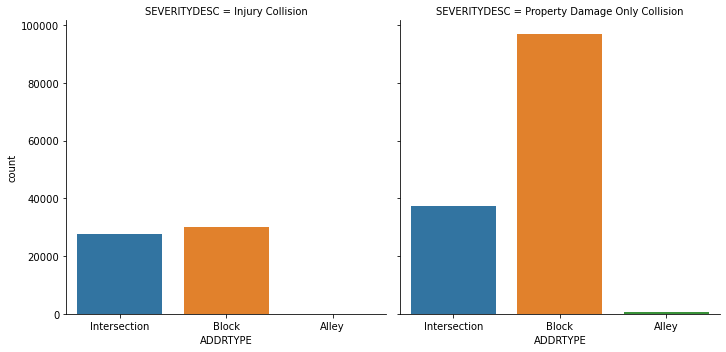

In [35]:
sns.catplot(x ="ADDRTYPE", data = df3, kind = "count",  col= "SEVERITYDESC")

# Show plot
plt.show()

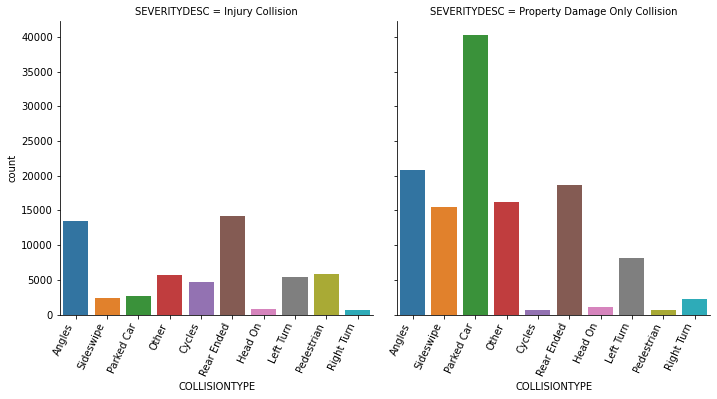

In [36]:
chart = sns.catplot(x = "COLLISIONTYPE", data = df4, kind = "count",  col= "SEVERITYDESC")
chart.set_xticklabels(rotation=65, horizontalalignment='right')

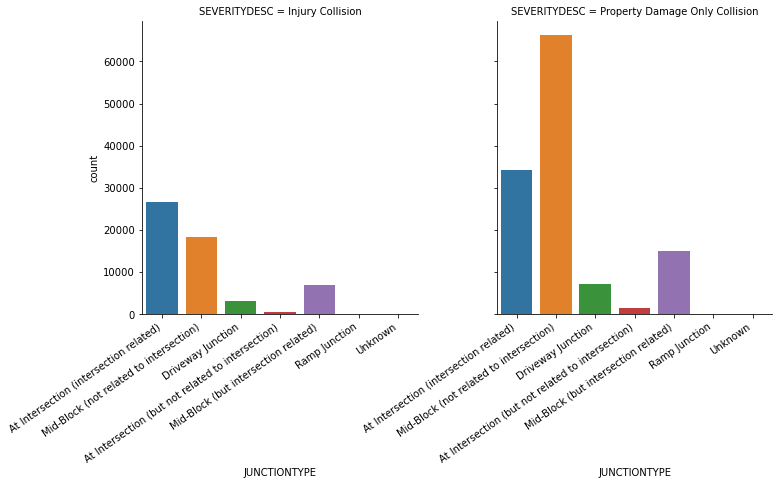

In [37]:
chart1 = sns.catplot(x = "JUNCTIONTYPE", data = df4, kind = "count",  col= "SEVERITYDESC")
chart1.set_xticklabels(rotation=35, horizontalalignment='right')

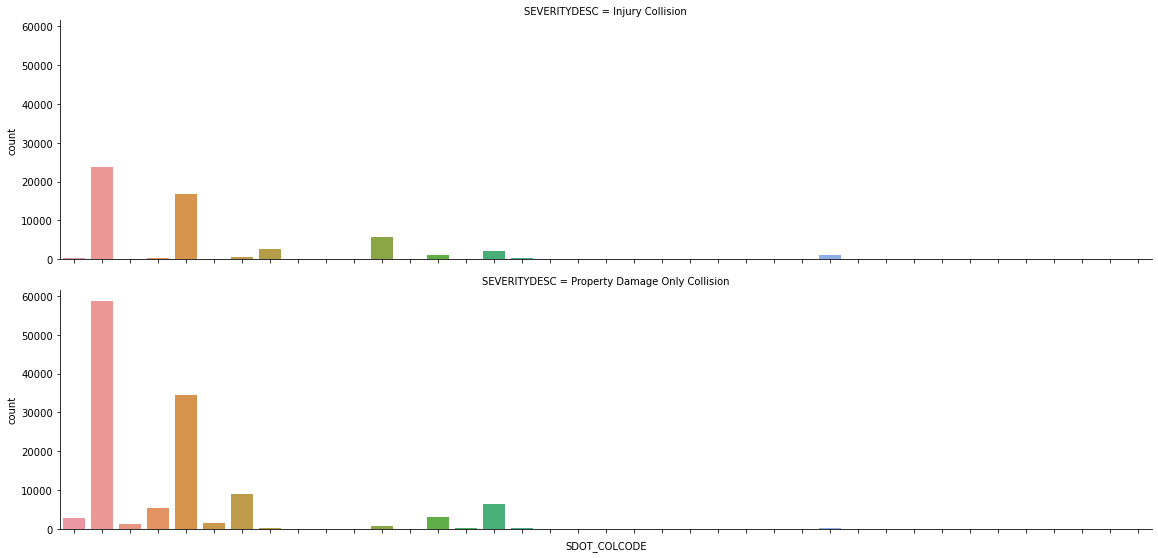

In [38]:
chart2 = sns.catplot(x = "SDOT_COLCODE", data = df4, kind = "count",  row= "SEVERITYDESC",aspect=4,height=4)
chart2.set_xticklabels(rotation=65)

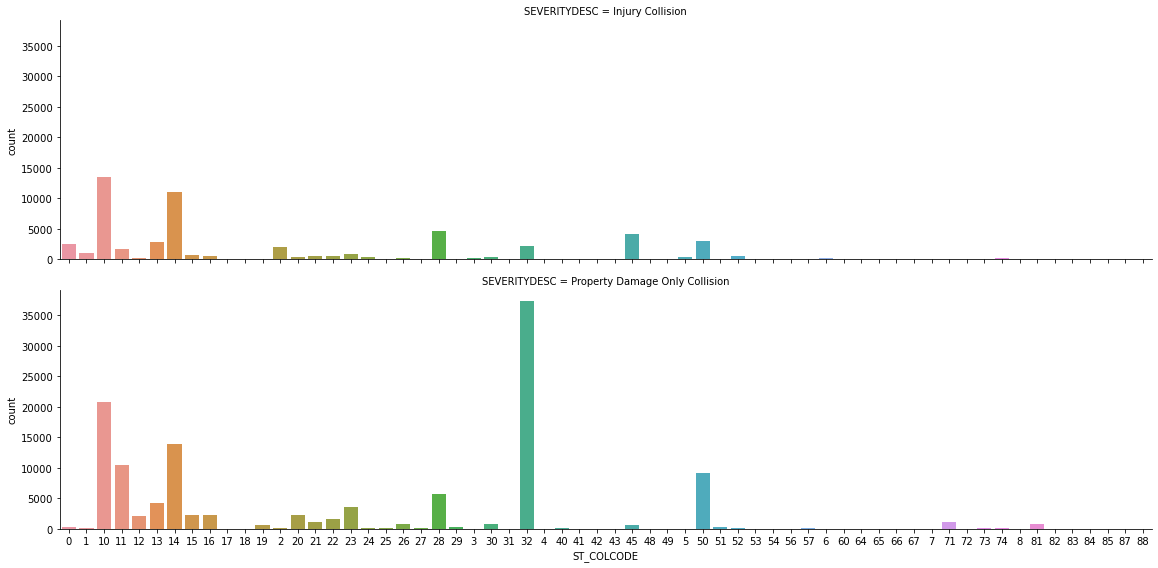

In [39]:
chart3 = sns.catplot(x = "ST_COLCODE", data = df4, kind = "count",  row= "SEVERITYDESC",aspect=4,height=4)

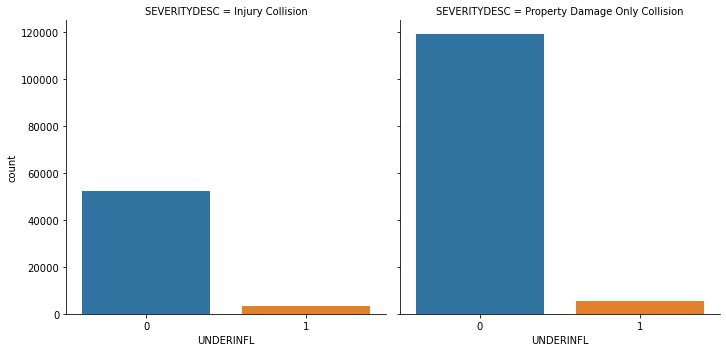

In [40]:
chart4 = sns.catplot(x = "UNDERINFL", data = df4, kind = "count",  col= "SEVERITYDESC")

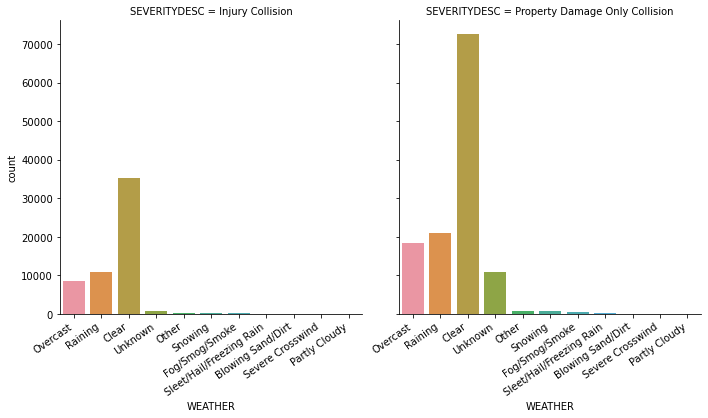

In [41]:
chart5 = sns.catplot(x = "WEATHER", data = df4, kind = "count",  col= "SEVERITYDESC")
chart5.set_xticklabels(rotation=35, horizontalalignment='right')

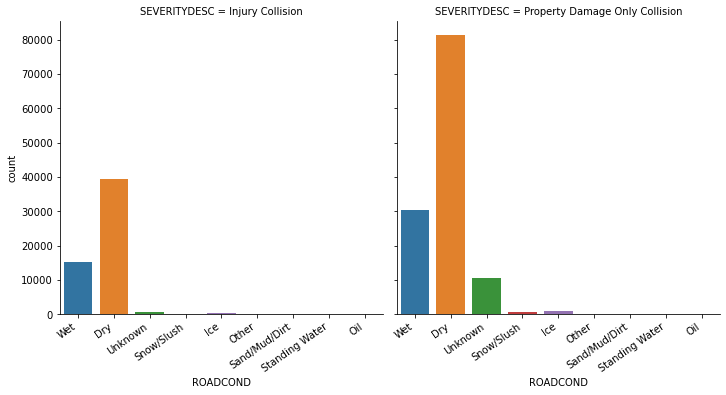

In [42]:
chart6 = sns.catplot(x = "ROADCOND", data = df4, kind = "count",  col= "SEVERITYDESC")
chart6.set_xticklabels(rotation=35, horizontalalignment='right')

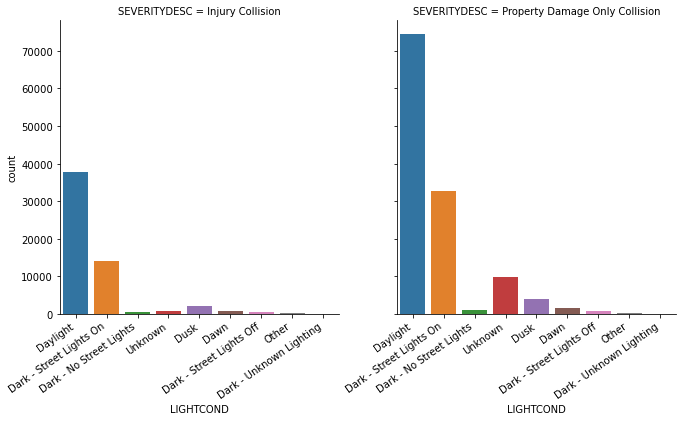

In [43]:
chart7 = sns.catplot(x = "LIGHTCOND", data = df4, kind = "count",  col= "SEVERITYDESC")
chart7.set_xticklabels(rotation=35, horizontalalignment='right')

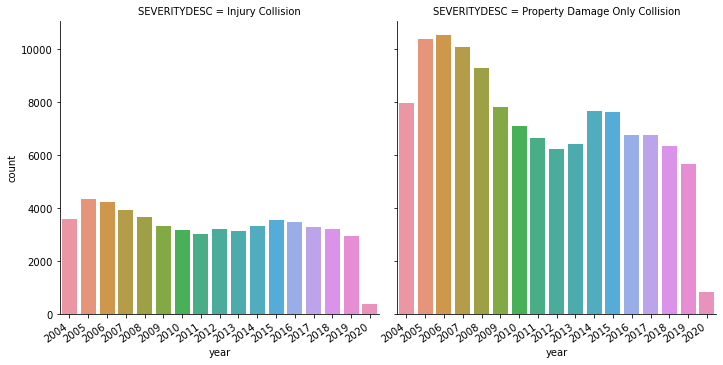

In [44]:
chart9 = sns.catplot(x = "year", data = df4, kind = "count",  col= "SEVERITYDESC")
chart9.set_xticklabels(rotation=35, horizontalalignment='right')

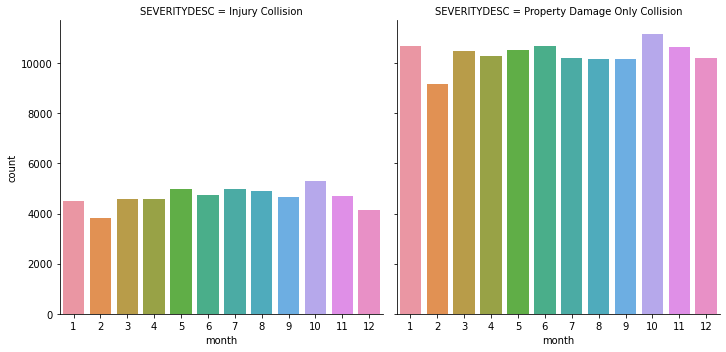

In [45]:
chart10 = sns.catplot(x = "month", data = df4, kind = "count",  col="SEVERITYDESC")

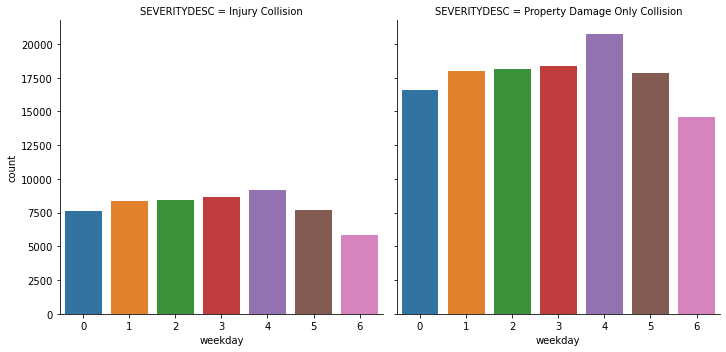

In [46]:
chart11 = sns.catplot(x = "weekday", data = df4, kind = "count",  col= "SEVERITYDESC")

<AxesSubplot:xlabel='PERSONCOUNT'>

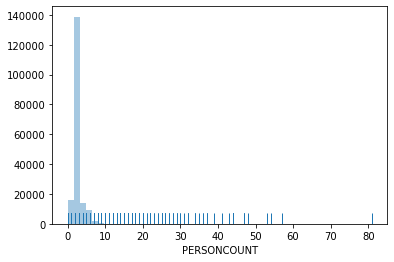

In [47]:
sns.distplot(df4["PERSONCOUNT"],kde=False, rug=True)

In [48]:
df_2020 = df4[(df4["year"] == 2020)]
df_2020.shape

(1236, 22)

In [49]:
# Seattle latitude and longitude values
latitude = 47.6
longitude = -122.3

# create map and display it
seattle_map = folium.Map(location=[latitude, longitude], zoom_start=12)

In [50]:
# let's start again with a clean copy of the map of San Francisco
seattle_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(seattle_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_2020.Y, df_2020.X, df_2020.SEVERITYDESC):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
seattle_map

In [51]:
df4a = df4.drop(["SEVERITYDESC","INCDATE","year","month","weekday"],axis = 1)

In [52]:
df5 = pd.get_dummies(data=df4a, columns=['ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE','WEATHER', 'ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR'])
df5.shape

(180067, 60)

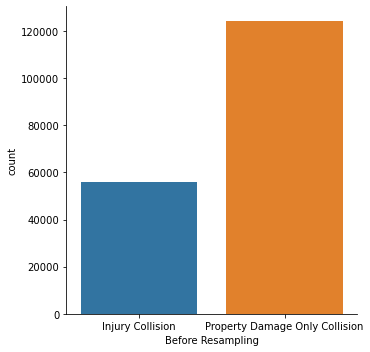

In [54]:
ax = sns.catplot(x = "SEVERITYDESC", data = df4, kind = "count")
ax.set(xlabel='Before Resampling')

In [55]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df5[df5.SEVERITYCODE==1]
df_minority = df5[df5.SEVERITYCODE==2]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=126270,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df6 = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df6.SEVERITYCODE.value_counts()

2    126270
1    124258
Name: SEVERITYCODE, dtype: int64

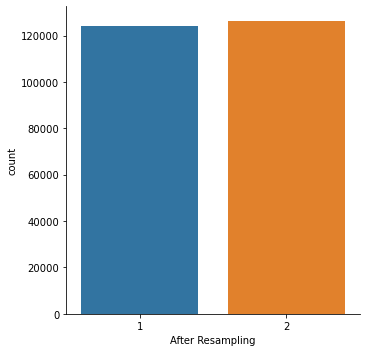

In [56]:
ax2 = sns.catplot(x = "SEVERITYCODE", data = df6, kind = "count")
ax2.set(xlabel='After Resampling')

In [57]:
df6.shape

(250528, 60)

In [58]:
y = df6.SEVERITYCODE
X = df6.drop('SEVERITYCODE', axis=1)

In [59]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [60]:
print(X_trainset.shape)
print(X_testset.shape)
print(y_trainset.shape)
print(y_testset.shape)

(175369, 59)
(75159, 59)
(175369,)
(75159,)


In [61]:
from sklearn.tree import DecisionTreeClassifier

decTree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
decTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [62]:
decTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [63]:
predTree = decTree.predict(X_testset)

In [64]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.7103740071049375


In [65]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

print("DecisionTree's Accuracy: ", metrics.accuracy_score(y_testset, predTree))
print("DecisionTree's F1-Score: ", f1_score(y_testset, predTree, average='weighted'))

DecisionTree's Accuracy:  0.7103740071049375
DecisionTree's F1-Score:  0.7051898592419864


     |████████████████████████████████| 307kB 9.0MB/s eta 0:00:01


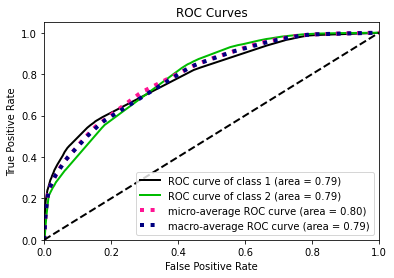

In [66]:
! pip install scikit-plot
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = y_testset
y_probas_tree = decTree.predict_proba(X_testset)
skplt.metrics.plot_roc(y_true, y_probas_tree)
plt.show()

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainset,y_trainset)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [68]:
yhat_lr = LR.predict(X_testset)
yhat_prob_lr = LR.predict_proba(X_testset)
yhat_lr[0:5]
yhat_prob_lr[0:5]

array([[0.62621191, 0.37378809],
       [0.39570921, 0.60429079],
       [0.11472493, 0.88527507],
       [0.3568908 , 0.6431092 ],
       [0.95161673, 0.04838327]])

In [69]:
from sklearn.metrics import log_loss
print("Logistic Regression's Accuracy: ", metrics.accuracy_score(y_testset, yhat_lr))
print("Logistic Regression's F1-Score: ", f1_score(y_testset, yhat_lr, average='weighted'))
print("Logistic Regression's LogLoss : ", log_loss(y_testset, yhat_prob_lr))

Logistic Regression's Accuracy:  0.7038012746311154
Logistic Regression's F1-Score:  0.7004139410689796
Logistic Regression's LogLoss :  0.5445183510374939


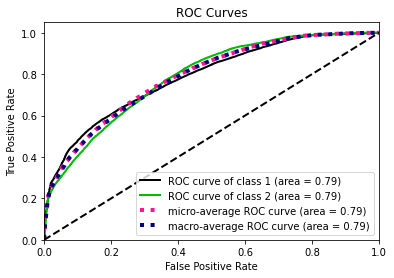

In [78]:
y_true = y_testset
y_probas = yhat_prob_lr
skplt.metrics.plot_roc(y_true, y_probas)
plt.show()